In [193]:
from sklearn.datasets import load_breast_cancer
import pandas as pd 
breast = load_breast_cancer()
df = pd.DataFrame(breast.data , columns=breast.feature_names)
df["diagnosis"] = breast.target

from sklearn.model_selection import train_test_split , StratifiedGroupKFold
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , stratify = y , random_state = 1)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

kfold = StratifiedKFold(n_splits = 10 , shuffle= True, random_state=1).split(X_train , y_train)
cvscore = []

for i , (train , val) in  enumerate(kfold):
   scaler = StandardScaler()
   X_train_sc = scaler.fit_transform(X_train[train])
   X_val_sc = scaler.transform(X_train[val])

   pca=PCA(n_components=2)
   X_train_sc = pca.fit_transform(X_train_sc)
   X_val_sc = pca.transform(X_val_sc)
   
   model = LogisticRegression(solver = "liblinear" , random_state = 1)
   model.fit(X_train_sc , y_train[train])
   
   score = model.score(X_val_sc , y_train[val])
   cvscore.append(score)
   print("폴드 : ",i+1 , "정확도 :", score)
print("\n CV 정확도 : ", np.mean(cvscore))

폴드 :  1 정확도 : 1.0
폴드 :  2 정확도 : 0.9347826086956522
폴드 :  3 정확도 : 0.9130434782608695
폴드 :  4 정확도 : 0.9347826086956522
폴드 :  5 정확도 : 0.9782608695652174
폴드 :  6 정확도 : 0.9333333333333333
폴드 :  7 정확도 : 0.9333333333333333
폴드 :  8 정확도 : 0.9777777777777777
폴드 :  9 정확도 : 0.9555555555555556
폴드 :  10 정확도 : 0.9333333333333333

 CV 정확도 :  0.9494202898550725


In [181]:
from sklearn.datasets  import load_breast_cancer
import pandas as pd
import numpy as np 

breast  = load_breast_cancer() 

df = pd.DataFrame(breast.data, columns = breast.feature_names) #BREAST 를 먼저 실행해서 보면 FEATURES_NAME이 있음. 
df["diagnosis"] = breast.target #diagnosis 열 추가. (target 안에 0, 1  즉 benign 악성 , malignant 양성  이있음)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [48]:
df["diagnosis"].value_counts() #benign 0 , malignant 1 - 개수 확인 

1    357
0    212
Name: diagnosis, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values #젤 마지막 것 빼고 전부 + .values 값만 뽑아내기 
y = df.iloc[:,-1].values #젤 마지막 것 만 + .values 값만 뽑아내기

X_train, X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2 , stratify = y ,random_state = 1 )
# X_train, X_val , y_train , y_val = train_test_split( X_train , y_train , test_size = 0.2 , stratify = y ,random_state = 1 )

#트레인 셋을 한번더 분할을 해야함. 왜냐면. 일반적으로 머신러닝 모델의 학습은 훈련 데이터를 사용하여 이루어지며, 
#훈련 데이터를 [훈련셋]과 [검증셋]으로 나누어 사용함 그러나 검증셋을 사용하여 모델을 튜닝하고 성능을 평가하는 과정에서,
#모델은 검증셋에 대한 정보를 학습할 수 있음 ,이를 방지하기 위해 훈련 데이터를 [훈련셋], [검증셋], 그리고 [테스트셋]으로 나눔 

#먼저 [훈련셋] 과  [테스트] 셋 을 나누고                        #테스트는 미래에 들어올 데이터 
#그뒤 [훈련셋]을 [훈련셋]과 [검증셋] 으로 나눔.  8: 2 비율로      #검증셋또한 미래에 들어올 데이터 

# 모델은 [훈련셋]으로만 만들고 , 학습은 [검증셋]만으로 하고 , 최정적으로 [test ]


#조금더 심화적인 검증방법 (이렇게 하는방법이 있다~ )
#훈련섹과 테스트 셋을 나눴을때 훈련셋을 5등분 냄. 그리고 한조각을 검증으로 쓰고 나머지 4조각을 트레인으로 쓰면 
#4개로 된걸 또 한조각을 검증 나머지 3조각을 트레인으로 써서 1조각의 검증이 남을때까지의 5개의 평균을 냄. 
#검증과정에서 데이터셋에 전체에 대한 분포를 나타낼수있음. 

#나눌 갯수를 k 라고 하면 ->  "k곂 교차검증"(K - fold cross validation) 이라고함 

In [58]:
from sklearn.model_selection import StratifiedKFold , train_test_split #StratifiedKFold X train에 validation 골고루 분배할때 씀. 

#데이터 셋 
X = df.iloc[:, :-1].values #입력 데이터
y = df.iloc[:,-1].values   #타겟 데이터 


X_train, X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2 , stratify = y ,random_state = 1 )

# k -fold cross validation 
kfold = StratifiedKFold(n_splits = 10 , shuffle = True , random_state = 1 ).split(X_train , y_train)
#n_splits - > k 값 설정 (몇개로 분할할것인지) 
#이떄 kfold 는 generator 임. range 안에 저장된 값이 아니라 불러오면 값을 가져오는.  

In [62]:
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

kfold = StratifiedKFold(n_splits = 10 , shuffle = True , random_state = 1 ).split(X_train , y_train)
cvscore = []

for i , (train , val) in enumerate(kfold):
#     print(train) #train set의 인덱스 
#     print(val)  #trains 에 없는게 val 에 있음. 

      #모델 전처리 
      scaler = StandardScaler()
      X_train_sc = scaler.fit_transform(X_train[train])
      X_val_sc = scaler.transform(X_train[val])
      
      #학습 
      pca = PCA(n_components= 2 ) #차원축소 -> n_components 2차원으로 축소
      X_train_sc = pca.fit_transform(X_train_sc) 
      X_val_sc = pca.transform(X_val_sc)
    
      model = LogisticRegression(solver = "liblinear", random_state = 1)  
      model.fit(X_train_sc, y_train[train])
#       p_val = model.predict(X_val_sc)
      score = model.score(X_val_sc, y_train[val])
      cvscore.append(score)
      print(f"폴드 {i+1}. 정확도 : {score}")
    
print("\nCV 정확도 : ", np.mean(cvscore))

폴드 1. 정확도 : 1.0
폴드 2. 정확도 : 0.9347826086956522
폴드 3. 정확도 : 0.9130434782608695
폴드 4. 정확도 : 0.9347826086956522
폴드 5. 정확도 : 0.9782608695652174
폴드 6. 정확도 : 0.9333333333333333
폴드 7. 정확도 : 0.9333333333333333
폴드 8. 정확도 : 0.9777777777777777
폴드 9. 정확도 : 0.9555555555555556
폴드 10. 정확도 : 0.9333333333333333

CV 정확도 :  0.9494202898550725


In [72]:
from sklearn.model_selection import cross_val_score #함수는 교차 검증을 수행하여 모델의 성능을 추정하는 데 사용
from sklearn.pipeline import make_pipeline          #여러 단계로 이루어진 파이프라인을 만드는 데 사용


lr_pipe = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(solver = "liblinear", random_state = 1))

# lr_pipe.fit(X_train,y_train) 
# lr_pipe.predict(X_test)

# 을 사용하여 파이프라인 lr_pipe를 생성합니다. 파이프라인은 세 가지 단계로 구성
# 첫 번째 단계: StandardScaler()는 입력 데이터를 평균 0, 표준 편차 1로 스케일링하는 단계
# 두 번째 단계: PCA(n_components=2)는 주성분 분석을 수행하여 입력 데이터의 차원을 2로 축소하는 단계.
# 세 번째 단계: LogisticRegression(solver="liblinear", random_state=1)는 로지스틱 회귀 모델을 생성하는 단계


#교차검증 수행 
cvscore =cross_val_score(estimator = lr_pipe , X = X_train , y = y_train, cv = 10  , n_jobs = -1) 
# estimator=lr_pipe: 교차 검증을 수행할 모델로 lr_pipe를 지정
# X=X_train, y=y_train: 입력 데이터 X_train과 타겟 데이터 y_train을 지정합
# cv=10: 10-fold 교차 검증을 수행
# n_jobs=-1: 모든 CPU 코어를 사용하여 병렬로 교차 검증을 수행, n_jobs 가 1이면 차례대로, -1 이면 cv 개수만큼 . 


print("\nCV 정확도 : ", np.mean(cvscore)) #교차 검증의 정확도 평균을 출력
cvscore


CV 정확도 :  0.945072463768116


array([0.97826087, 0.93478261, 0.95652174, 0.93478261, 0.91304348,
       0.95555556, 0.93333333, 0.95555556, 0.93333333, 0.95555556])

In [196]:
from sklearn.model_selection import learning_curve #함수는 학습 곡선을 그리는 데 사용

#  파이프라인 생성
lr_pipe = make_pipeline(StandardScaler(), 
#                         PCA(n_components=2),
                        LogisticRegression(solver = "liblinear",penalty = 'l2', random_state = 1))
# 파이프라인 lr_pipe를 생성합니다. 파이프라인은 두 가지 단계로 구성.
# 첫 번째 단계: StandardScaler()는 입력 데이터를 평균 0, 표준 편차 1로 스케일링하는 단계
# 두 번째 단계:  L2x 규제를 적용한 로지스틱 회귀 모델을 생성하는 단계
    #     solver는 로지스틱 회귀 알고리즘의 최적화 방법을 지정하고,
    #     penalty는 규제 유형을 지정하며,
    #     random_state는 재현 가능한 랜덤 분할을 위한 시드 값입니다.


#학습 곡선 계산
sizes , train_score , val_score = learning_curve(estimator= lr_pipe , X= X_train , y= y_train , 
               train_sizes = np.linspace(0.1,1.0,10), cv= 10 , n_jobs= -1 )
# estimator=lr_pipe: 학습 곡선을 계산할 모델로 lr_pipe 파이프라인을 지정
# X=X_train, y=y_train: 입력 데이터 X_train과 타겟 데이터 y_train을 지정
# train_sizes = np.linspace(0.1, 1.0, 10): 학습에 사용할 데이터의 상대적인 크기를 지정
#     여기서는 10개의 점으로 구성된 배열을 생성하여 상대적인 크기를 지정
# cv=10: 10-fold 교차 검증을 수행
# n_jobs=-1: 모든 CPU 코어를 사용하여 병렬로 학습 곡선을 계산


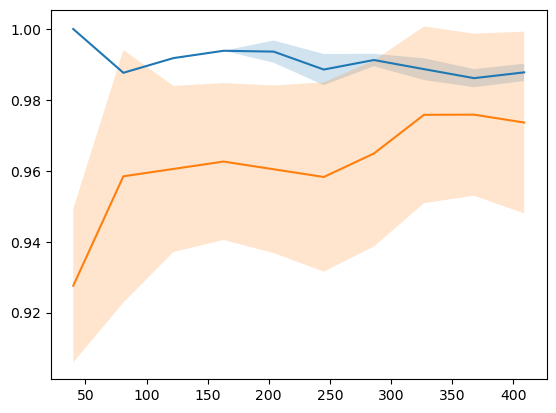

In [130]:
import matplotlib.pyplot as plt

train_mean = np.mean(train_score, axis=1) # 배열의 평균을 계산하여 학습 데이터의 크기에 따른 학습 점수의 평균 
val_mean = np.mean(val_score, axis=1) #배열의 평균을 계산하여 학습 데이터의 크기에 따른 검증 점수의 평균
train_std = np.std(train_score, axis=1) #배열의 표준 편차를 계산하여 학습 데이터의 크기에 따른 학습 점수의 표준 편차
val_std = np.std(val_score, axis=1) #배열의 표준 편차를 계산하여 학습 데이터의 크기에 따른 검증 점수의 표준 편차

plt.figure()
plt.plot(sizes , train_mean)
plt.fill_between(sizes, train_mean + train_std , train_mean - train_std,
                alpha = 0.2 )
#학습 데이터의 크기에 따른 학습 점수의 평균에서 표준 편차를 더하고 빼서 영역을 채우는 그래프 
# 학습 점수의 변동성을 시각화

plt.plot(sizes , val_mean) 
plt.fill_between(sizes, val_mean + val_std , val_mean - val_std,
                alpha = 0.2 ) 
plt.show()

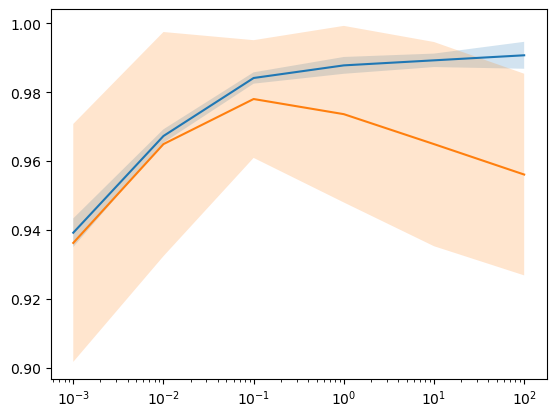

In [154]:
from sklearn.model_selection import validation_curve #검증 곡선을 그리는 데 사용

#C 값 범위 설정:
C_range = np.logspace(-3 , 2 , 6 , base =10)  #로지스틱 회귀 모델의 규제 강도를 조정
# np.logspace(start , stop , n , base =10) 
# start 를 0 부터 4까지 를 주면 , 
# 결과가 base인 10의 0승부터 10의 4승까지 나옴 

#파이프라인 생성
lr_pipe = make_pipeline(StandardScaler(),
#                         PCA(n_components=2),
                        LogisticRegression(solver = "liblinear",penalty = 'l2', random_state = 1))
#첫 번째 단계: StandardScaler()는 입력 데이터를 평균 0, 표준 편차 1로 스케일링하는 단계입니다.
# 두 번째 단계:  L2 규제를 적용한 로지스틱 회귀 모델을 생성하는 단계
                #solver는 로지스틱 회귀 알고리즘의 최적화 방법을 지정하고, 
                #penalty는 규제 유형을 지정하며, 
                #random_state는 재현 가능한 랜덤 분할을 위한 시드 값

train_score , val_score = validation_curve(estimator= lr_pipe , X= X_train , y= y_train , 
              param_name = "logisticregression__C" , param_range = C_range, cv= 10 , n_jobs= -1 )

#estimator가 logistic regression 이면 param_name = "C" 이게 작동하는데 pipe 라서 안됨 


train_mean = np.mean(train_score, axis=1)
val_mean = np.mean(val_score, axis=1)
train_std = np.std(train_score, axis=1)
val_std = np.std(val_score, axis=1)

plt.figure()
plt.plot(C_range , train_mean)
plt.fill_between(C_range, train_mean + train_std , train_mean - train_std,
                alpha = 0.2 )
                 
plt.plot(C_range , val_mean) 
plt.fill_between(C_range, val_mean + val_std , val_mean - val_std,
                alpha = 0.2 ) 

plt.xscale("log")
plt.show()

In [158]:
from sklearn.model_selection import GridSearchCV # 그리드 서치를 수행하는 데 사용
from sklearn.svm import SVC

svc_pipe = make_pipeline(StandardScaler() , SVC(random_state=1))
C_range = np.logspace(-4 , 3 , 8 , base =10) 
gamma_range = np.logspace(-4 , 3 , 8 , base =10) #np.logspace를 사용하여 로그 스케일로 gamma 값의 범위를 설정 
                                                 #start=-4부터 stop=3까지 8개의 로그 스케일로 분포하는 gamma 값들이 생성
param_grid = [{"svc__C" : C_range,
              "svc__kernel" : ["linear"]}, #리스트로 2개로 나눈이유가 gamma가 linear 일때는 무의미 하기때문에 ! 
             {"svc__C" : C_range,
              "svc__gamma" : gamma_range,
              "svc__kernel" : ["rbf"]}]

gs = GridSearchCV(estimator = svc_pipe, param_grid = param_grid,
             scoring = "accuracy", cv = 10 , n_jobs = -1) 
#GridSearchCV를 사용하여 그리드 서치를 생성
# estimator=svc_pipe: 그리드 서치를 수행할 모델로 svc_pipe 파이프라인을 지정
# param_grid=param_grid: 그리드 서치에 사용할 매개변수 그리드를 지정
# scoring="accuracy": 모델의 성능을 평가할 지표로 정확도를 사용
# cv=10: 10개의 교차 검증 폴드를 사용하여 그리드 서치를 수행
# n_jobs=-1: 모든 CPU 코어를 사용하여 병렬로 계산

In [159]:
gs = gs.fit( X_train , y_train )

In [160]:
gs.best_score_

0.9758454106280192

In [161]:
gs.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10.0, gamma=0.001, random_state=1))])

In [162]:
gs.best_params_

{'svc__C': 10.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}

In [163]:
lr_gs = GridSearchCV(estimator= LogisticRegression, cv = 2)
svc_gs = GridSearchCV(estimator=SVC)
forest_gs = ...
#시험칠때 "가" 형 , "나" 형으로 치는...~ 

#아래와 같이할때 cv 값을 줄이는게 좋음 why  :  10 등분에 또 10등분이라 100등분이라 한폴드가 너무작아짐 
#그래서 보통 위아래 곱해서 10이 나오게 하는게 좋음,  아래것이 크게 위에것이 작게
lr_score = cross_val_score(estimator=lr_gs , cv = 5)
svc_score = cross_val_score(estimator=svc_gs)
forest_score = cross_val_score(estimator=forest_gs)

TypeError: GridSearchCV.__init__() missing 1 required positional argument: 'param_grid'